<h1><center>Industry Application of Analytics </center></h1>

![](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

# Topics
1. Introduction to Business Analytics. 
2. Basic Statistics 
3. Exploratory Data Analysis with pandas
4. Data Visualization with Seaborn (optional) 
5. Modelling with python:- 
    - Regression 
        - Linear Regression 
    - Classification
        - Logistic Regression (We meet again !)
        - Decision Tree 
    - Analysing our models
6. Data Visualization with Matplotlib 
7. Churn Analysis
8. Social Media Analytics
    - Web Scraping
9. Marketing Analytics (maybe !)
10. Time Series Forecasting (maybe maybe !!)  <------------------------------------------------ **This is where we are**
11. Supply Chain Analytics (maybe maybe maybe !!!)

# Compents of Time -Series

A time series visualization may consist of the following components:
 - Trend
 -   Seasonality
 -  Error


![](https://itfeature.com/wp-content/uploads/2020/03/component-of-time-series.png)

In [16]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [17]:
# loading the electric production data
data =  pd.read_csv('datasets/Electric_Production.csv')

In [18]:
data

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [19]:
# casting date column into datetime and setting index
data['DATE'] = pd.to_datetime(data['DATE'])

In [20]:
data

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [21]:
data = data.set_index('DATE')

In [22]:
data

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [23]:
data = data.iloc[:100,:]

In [24]:
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# Let's plot

In [25]:
sns.set_theme(style="darkgrid")

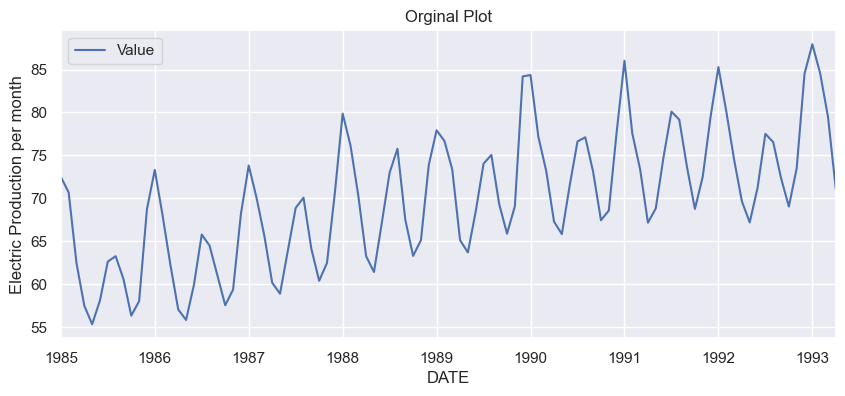

In [26]:
# Creating the plot
data.plot(ylabel = "Electric Production per month",title = 'Orginal Plot', figsize = (10,4));

# Decomposition of time series data with statsmodel python modules
The time Series can be decompose into two ways:
- additive
- multipicative

# Additive Decomposition
`Value = Tend + Seasonality + Error`

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
result = seasonal_decompose(data, model='additive',period= 12, extrapolate_trend='freq')

In [31]:
result

In [25]:
result.seasonal

DATE
1985-01-01    10.637282
1985-02-01     6.051879
1985-03-01     0.757368
1985-04-01    -5.626366
1985-05-01    -7.208640
                ...    
1992-12-01     5.589329
1993-01-01    10.637282
1993-02-01     6.051879
1993-03-01     0.757368
1993-04-01    -5.626366
Name: seasonal, Length: 100, dtype: float64

In [26]:
result.trend

DATE
1985-01-01    61.508657
1985-02-01    61.577679
1985-03-01    61.646701
1985-04-01    61.715723
1985-05-01    61.784745
                ...    
1992-12-01    75.242129
1993-01-01    75.255004
1993-02-01    75.267879
1993-03-01    75.280754
1993-04-01    75.293629
Name: trend, Length: 100, dtype: float64

In [28]:
result.resid

DATE
1985-01-01    0.359260
1985-02-01    3.042442
1985-03-01    0.046131
1985-04-01    1.382043
1985-05-01    0.738994
                ...   
1992-12-01    3.684443
1993-01-01    2.054114
1993-02-01    3.236342
1993-03-01    3.436578
1993-04-01    1.390537
Name: resid, Length: 100, dtype: float64

In [29]:
result.observed

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
               ...   
1992-12-01    84.5159
1993-01-01    87.9464
1993-02-01    84.5561
1993-03-01    79.4747
1993-04-01    71.0578
Length: 100, dtype: float64

**The Component of the time series of Additive shown below :**

In [33]:
result_add = pd.concat([result.seasonal,result.trend,result.resid,result.observed], axis = 1)
result_add

,seasonal,trend,resid,0
DATE,,,,
1985-01-01,10.637282,61.508657,0.359260,72.5052
1985-02-01,6.051879,61.577679,3.042442,70.6720
1985-03-01,0.757368,61.646701,0.046131,62.4502
1985-04-01,-5.626366,61.715723,1.382043,57.4714
1985-05-01,-7.208640,61.784745,0.738994,55.3151
...,...,...,...,...
1992-12-01,5.589329,75.242129,3.684443,84.5159
1993-01-01,10.637282,75.255004,2.054114,87.9464
1993-02-01,6.051879,75.267879,3.236342,84.5561


In [34]:
result_add.columns= ['Seasoanilty','Trend','Residual','Actual_Vale']
result_add.head()

,Seasoanilty,Trend,Residual,Actual_Vale
DATE,,,,
1985-01-01,10.637282,61.508657,0.359260,72.5052
1985-02-01,6.051879,61.577679,3.042442,70.6720
1985-03-01,0.757368,61.646701,0.046131,62.4502
1985-04-01,-5.626366,61.715723,1.382043,57.4714
1985-05-01,-7.208640,61.784745,0.738994,55.3151


### Let's plot

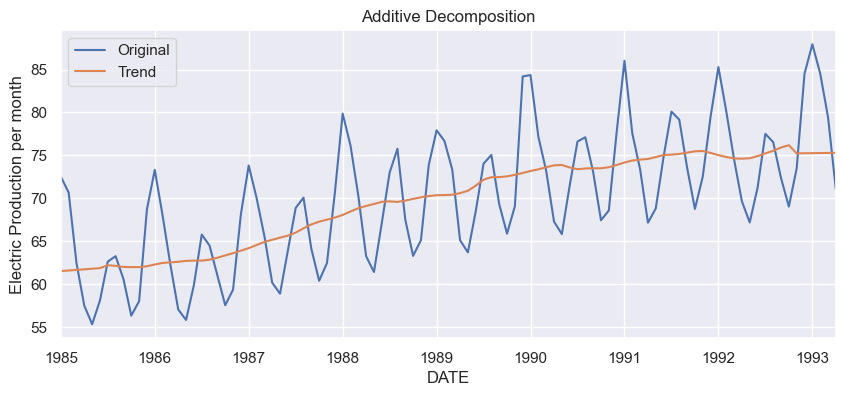

In [35]:
result.observed.plot(figsize=(10, 4), label='Original')
result.trend.plot(label='Trend',ylabel = "Electric Production per month",title  = 'Additive Decomposition')
plt.legend()
plt.show()

**Trend**

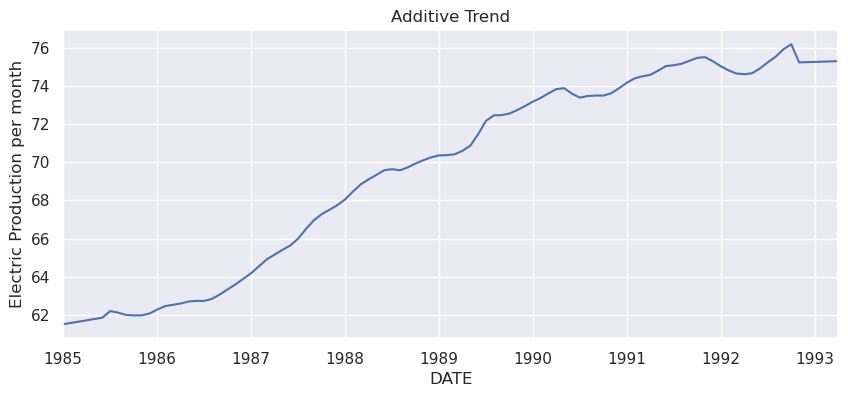

In [34]:
# plot trend in time series
result.trend.plot(figsize=(10, 4),title = 'Additive Trend',ylabel = "Electric Production per month",)
plt.show()

**Seasonality**


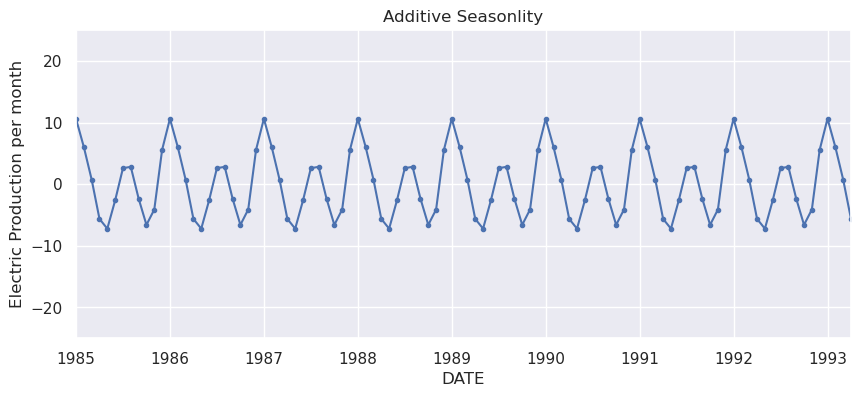

In [35]:
# Seasonality
result.seasonal.plot(figsize = (10,4),marker = '.', ylim = (-25,25),title ='Additive Seasonlity',ylabel = "Electric Production per month",);

**Residual**

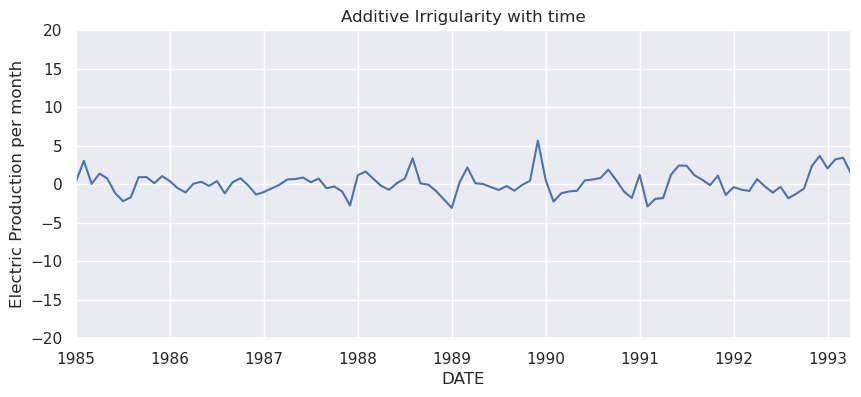

In [36]:
result.resid.plot(figsize=(10, 4), title = "Additive Irrigularity with time",ylabel = "Electric Production per month",ylim = (-20,20))
plt.show()

## Multiplicative Decomposition
`Value = Tend x Seasonality x Error`

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multilicative',period= 12, extrapolate_trend='freq')

In [37]:
result

In [38]:
result.seasonal

DATE
1985-01-01    1.153811
1985-02-01    1.088164
1985-03-01    1.010740
1985-04-01    0.919466
1985-05-01    0.895780
                ...   
1992-12-01    1.079268
1993-01-01    1.153811
1993-02-01    1.088164
1993-03-01    1.010740
1993-04-01    0.919466
Name: seasonal, Length: 100, dtype: float64

In [39]:
result.trend

DATE
1985-01-01    61.508657
1985-02-01    61.577679
1985-03-01    61.646701
1985-04-01    61.715723
1985-05-01    61.784745
                ...    
1992-12-01    75.242129
1993-01-01    75.255004
1993-02-01    75.267879
1993-03-01    75.280754
1993-04-01    75.293629
Name: trend, Length: 100, dtype: float64

In [40]:
result.resid

DATE
1985-01-01    1.021640
1985-02-01    1.054702
1985-03-01    1.002269
1985-04-01    1.012792
1985-05-01    0.999450
                ...   
1992-12-01    1.040754
1993-01-01    1.012856
1993-02-01    1.032383
1993-03-01    1.044493
1993-04-01    1.026403
Name: resid, Length: 100, dtype: float64

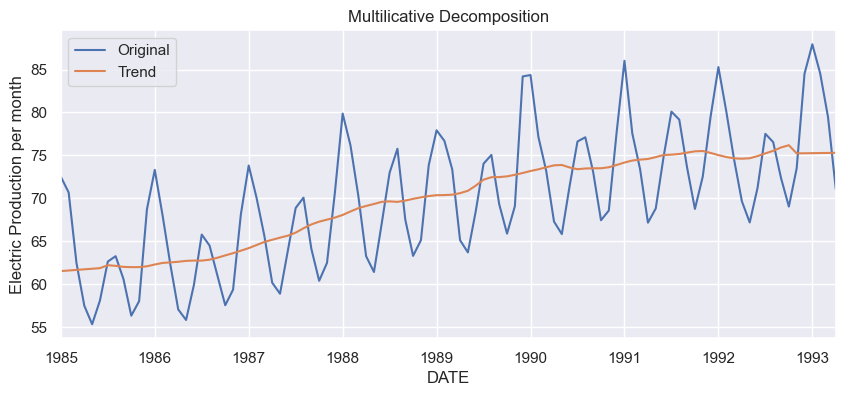

In [41]:
result.observed.plot(figsize=(10, 4), label='Original')
result.trend.plot(label='Trend',ylabel = "Electric Production per month",title  = 'Multilicative Decomposition')
plt.legend()
plt.show()

**The Component of the time series of Multilicative shown below :**

In [42]:
result_mult = pd.concat([result.seasonal,result.trend,result.resid,result.observed], axis = 1)
result_mult

,seasonal,trend,resid,0
DATE,,,,
1985-01-01,1.153811,61.508657,1.021640,72.5052
1985-02-01,1.088164,61.577679,1.054702,70.6720
1985-03-01,1.010740,61.646701,1.002269,62.4502
1985-04-01,0.919466,61.715723,1.012792,57.4714
1985-05-01,0.895780,61.784745,0.999450,55.3151
...,...,...,...,...
1992-12-01,1.079268,75.242129,1.040754,84.5159
1993-01-01,1.153811,75.255004,1.012856,87.9464
1993-02-01,1.088164,75.267879,1.032383,84.5561


In [43]:
result_mult.columns= ['Seasoanilty','Trend','Residual','Actual_Vale']
result_mult.head()

,Seasoanilty,Trend,Residual,Actual_Vale
DATE,,,,
1985-01-01,1.153811,61.508657,1.021640,72.5052
1985-02-01,1.088164,61.577679,1.054702,70.6720
1985-03-01,1.010740,61.646701,1.002269,62.4502
1985-04-01,0.919466,61.715723,1.012792,57.4714
1985-05-01,0.895780,61.784745,0.999450,55.3151


**Trend**

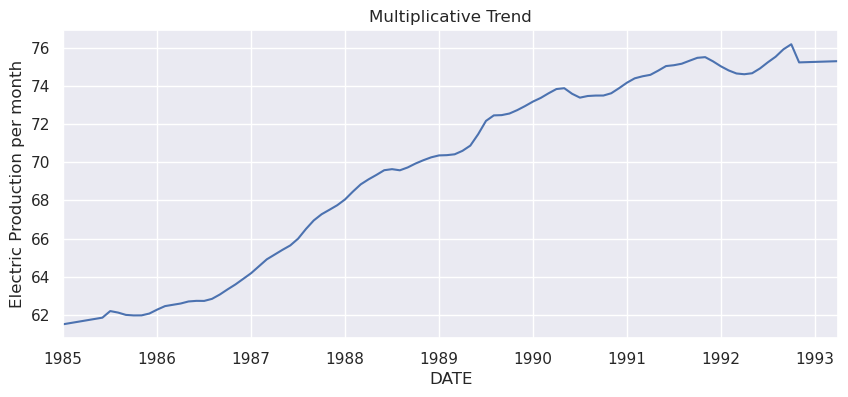

In [50]:
# plot trend in time series
result.trend.plot(figsize=(10, 4),title = 'Multiplicative Trend',ylabel = "Electric Production per month",)
plt.show()

**Seasonality**

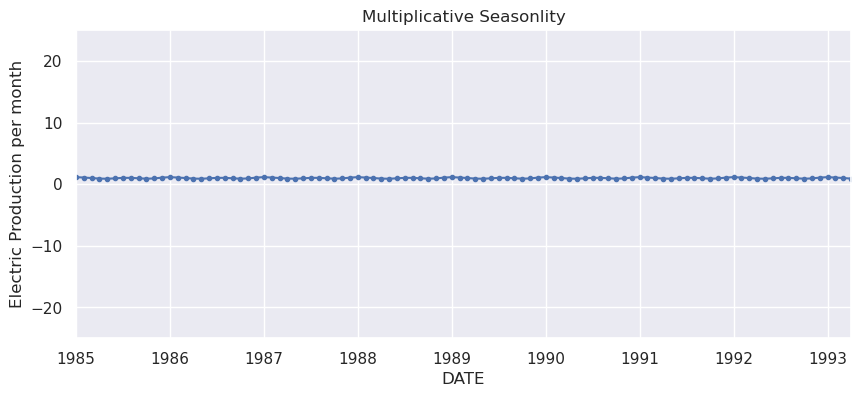

In [51]:
# Seasonality
result.seasonal.plot(figsize = (10,4),marker = '.', ylim = (-25,25),title ='Multiplicative Seasonlity',ylabel = "Electric Production per month",);

**Residual**

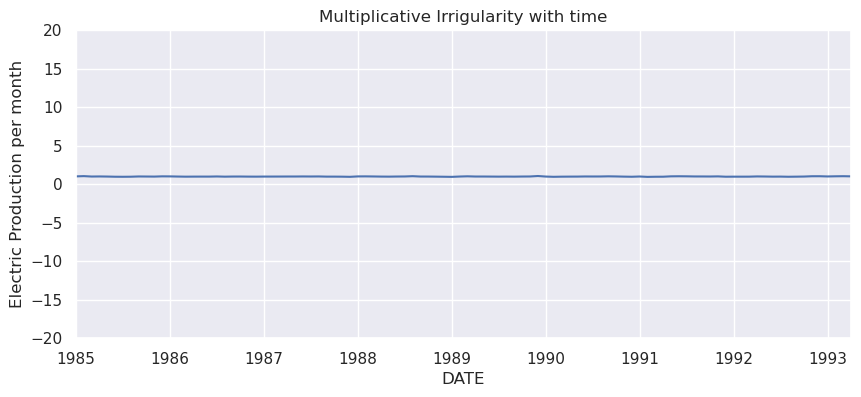

In [52]:
result.resid.plot(figsize=(10, 4), title = "Multiplicative Irrigularity with time",ylabel = "Electric Production per month",ylim = (-20,20))
plt.show()

# Part 2

# Stationary Time Series
- The observations in a stationary time series are not dependent on time.

- Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
- When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.



In [44]:
series = pd.read_csv('datasets/daily-total-female-births.csv', header=0, index_col=0)
series

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [45]:
series.index = pd.to_datetime(series.index)
series

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


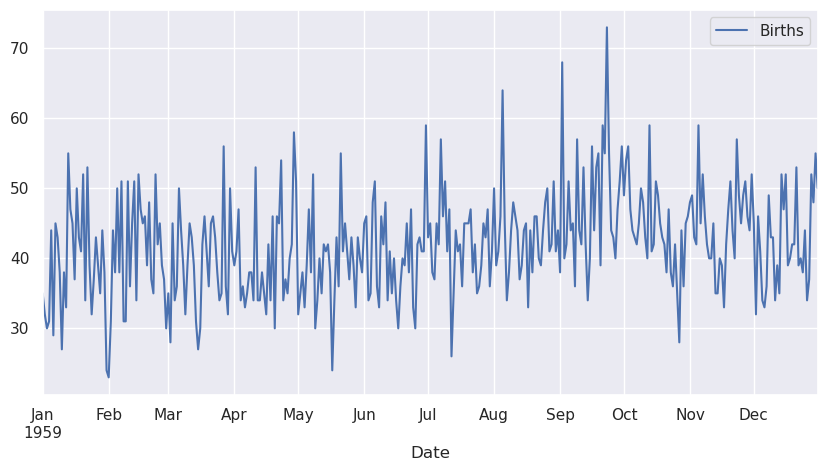

In [61]:
series.plot(figsize = (10,5));

# Non-Stationary Time Series
- Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.
- Airline Passengers dataset that is non-stationary, showing both trend and seasonal components.

In [46]:
series1 = pd.read_csv('datasets/Electric_Production.csv', header=0, index_col=0)
series1

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151
...,...
09-01-2017,98.6154
10-01-2017,93.6137
11-01-2017,97.3359


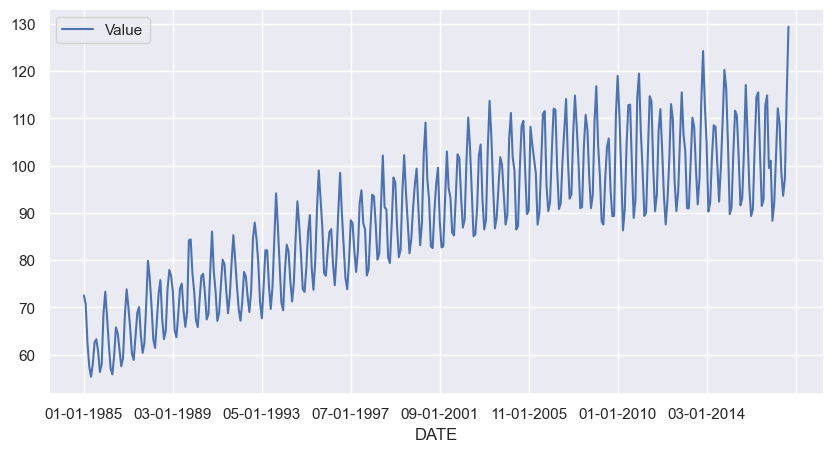

In [47]:
series1.plot(figsize  = (10,5));

## Stationary Time Series and Forecasting
If data has trend and seasonality in time series, then model these components, remove them from observations, then train models on the residuals.

# How will we check if our time-series is stationary

## Dickey-Fuller test
There are a number of unit root tests and the Dickey-Fuller may be one of the more widely used.
- **Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is **non-stationary**. It has some time dependent structure.
- **Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

- If **p-value > 0.05**: Fail to reject the null hypothesis (H0), the data has a unit root and is **non-stationary**.
- If **p-value <= 0.05**: Reject the null hypothesis (H0), the data does not have a unit root and is **stationary**.

In [51]:
from statsmodels.tsa.stattools import adfuller

In [52]:
series1

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151
...,...
09-01-2017,98.6154
10-01-2017,93.6137
11-01-2017,97.3359


In [53]:
series1.values

array([[ 72.5052],
       [ 70.672 ],
       [ 62.4502],
       [ 57.4714],
       [ 55.3151],
       [ 58.0904],
       [ 62.6202],
       [ 63.2485],
       [ 60.5846],
       [ 56.3154],
       [ 58.0005],
       [ 68.7145],
       [ 73.3057],
       [ 67.9869],
       [ 62.2221],
       [ 57.0329],
       [ 55.8137],
       [ 59.9005],
       [ 65.7655],
       [ 64.4816],
       [ 61.0005],
       [ 57.5322],
       [ 59.3417],
       [ 68.1354],
       [ 73.8152],
       [ 70.062 ],
       [ 65.61  ],
       [ 60.1586],
       [ 58.8734],
       [ 63.8918],
       [ 68.8694],
       [ 70.0669],
       [ 64.1151],
       [ 60.3789],
       [ 62.4643],
       [ 70.5777],
       [ 79.8703],
       [ 76.1622],
       [ 70.2928],
       [ 63.2384],
       [ 61.4065],
       [ 67.1097],
       [ 72.9816],
       [ 75.7655],
       [ 67.5152],
       [ 63.2832],
       [ 65.1078],
       [ 73.8631],
       [ 77.9188],
       [ 76.6822],
       [ 73.3523],
       [ 65.1081],
       [ 63.

# Let's run our test

In [54]:
adfuller(series1.values)

(-2.2569903500472455,
 0.18621469116586759,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [73]:
x = adfuller(series1.values)

In [74]:
x

(-2.2569903500472366,
 0.18621469116587053,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [75]:
# This is called ADF Statistic
x[0]

-2.2569903500472366

In [76]:
# This is called p-value and this is what we are looking for
x[0]

-2.2569903500472366

If this is less than 0.05, it means that the data is stationary and we are good to go for modelling. Otherwise, not good. 

### Let's make a function out of this. 

In [56]:
def DFTest(series):
    x = adfuller(series.values)
    print('ADF Statistic: %f' % x[0])
    print('p-value: %f' % x[1])
    if x[1] <= 0.05:
        print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
    else :
        print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")

In [57]:
# female brith rate
DFTest(series)

ADF Statistic: -4.808291
p-value: 0.000052
Reject the null hypothesis (H0), the data does not have a unit root and is stationary


p-value <= 0.05 and it reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [61]:
# Electric Production
DFTest(series1)

ADF Statistic: -2.256990
p-value: 0.186215
Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


<AxesSubplot:xlabel='DATE'>

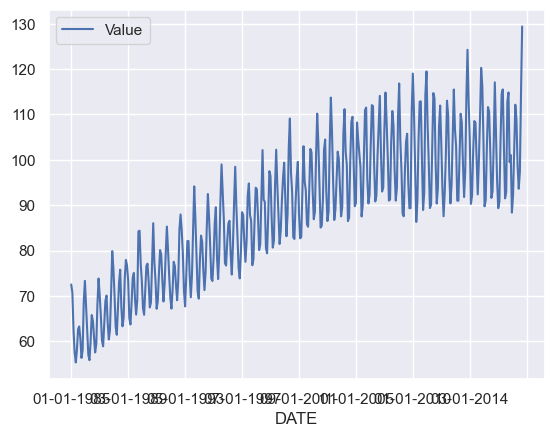

In [62]:
series1.plot()

- p-value > 0.05 it fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

As we can see that **female_birth_dataset** is **stationary** and Electric Production  is **non-stationary** data.

# Let's get to modelling

### ARMA Model
Y(t) = U + b1 * y-1 +  error(e) + e(t) + Q1*e(t-1) 

# AutoRegressive Integrated Moving Average (ARIMA) model
ARIMA is one of the time series forecasting models. It is a general class of models that includes different varieties.
### STEPS
There are follwing steps for ARIMA forecasting : 
1. Visualize the Time Series Data
2. Identify if the date is stationary , if data is stationary go to 3rd step otherwise perform differencing on data to make sationary.
3. Plot the Correlation and Auto Correlation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data (Here we will do only arima model).
#### A standard notation is used of ARIMA(p,d,q) .
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The shampoo dataset describes the monthly number of sales of shampoo over a 3 year period. The units are a sales count and there are 36 observations.

In [64]:
# reading shampoo sales data
data = pd.read_csv("datasets/shampoo.csv",index_col = 'Month')
data

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [65]:
data.index = pd.to_datetime(data.index)
data.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [66]:
print("The shape of the data :",data.shape)

The shape of the data : (36, 1)


# Splitting into train manually

In [67]:
# trian and test set
train = data[:round(len(data) * 0.9)]
test = data[round(len(data) * 0.9):]

In [68]:
print(f"Shape of train data : {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of train data : (32, 1)
Shape of test data : (4, 1)


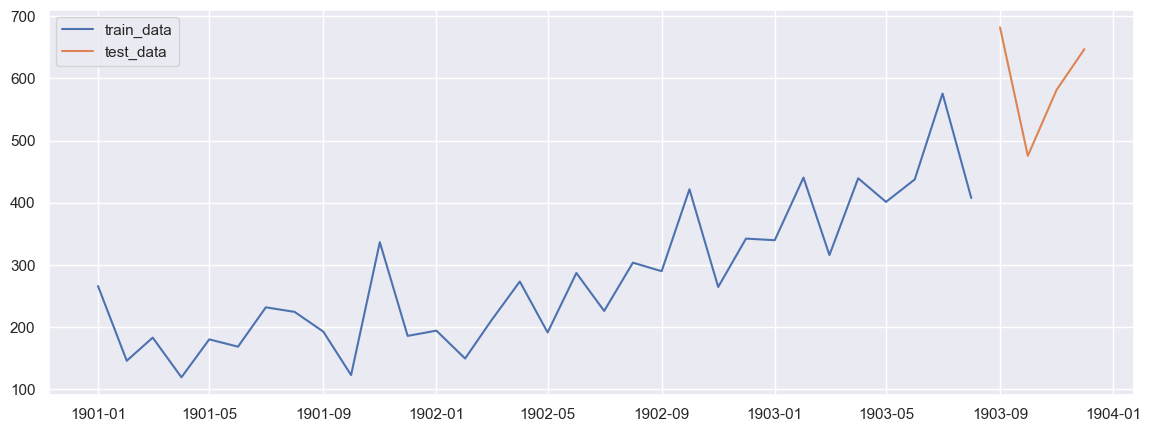

In [69]:
# univarite time series plot
plt.figure(figsize = (14,5))
plt.plot(train, label = 'train_data')
plt.plot(test,label = 'test_data')
plt.legend();

## Stationarity Test
- The observations in a stationary time series are not dependent on time.

In [70]:
# lets check for stationrity test for this we use adfuller test
DFTest(data)

ADF Statistic: 3.060142
p-value: 1.000000
Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


The data is non stationary and we need to make it stationary to do any modelling.

### In comes differencing

In [71]:
data

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


<Axes: xlabel='Month'>

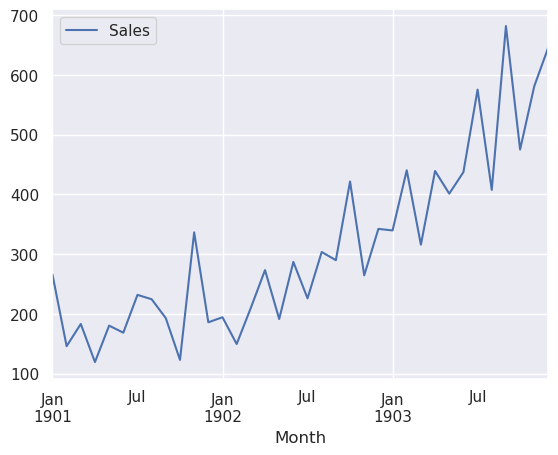

In [95]:
data.plot()

Now now, hear me out

In [73]:
data.head(5)

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [74]:
data.diff().head(5)

,Sales
Month,
1901-01-01,NaN
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0


In [75]:
data.diff()

,Sales
Month,
1901-01-01,NaN
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8
1901-07-01,63.3
1901-08-01,-7.3
1901-09-01,-31.7


In [78]:
data.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff()

,Sales
Month,
1901-01-01,NaN
1901-02-01,NaN
1901-03-01,NaN
1901-04-01,NaN
1901-05-01,NaN
1901-06-01,NaN
1901-07-01,NaN
1901-08-01,NaN
1901-09-01,NaN


<AxesSubplot:xlabel='Month'>

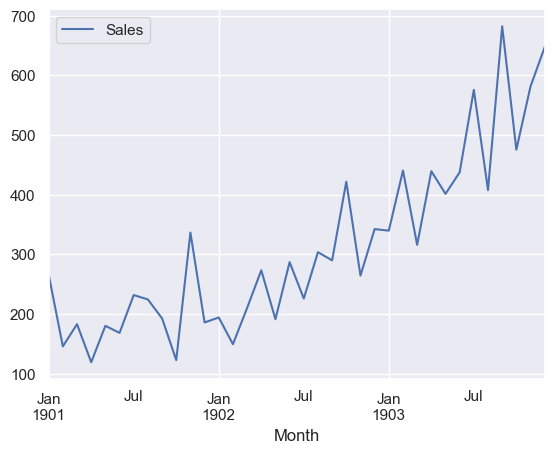

In [79]:
data.plot()

<Axes: xlabel='Month'>

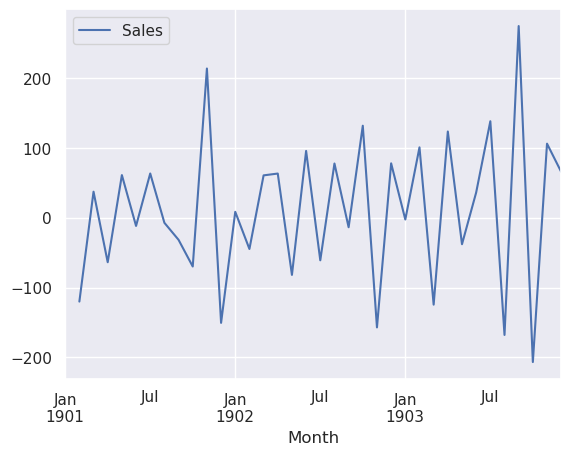

In [98]:
data.diff().plot()

In [99]:
data.diff().diff()

,Sales
Month,
1901-01-01,NaN
1901-02-01,NaN
1901-03-01,157.3
1901-04-01,-101.0
1901-05-01,124.8
1901-06-01,-72.8
1901-07-01,75.1
1901-08-01,-70.6
1901-09-01,-24.4


<Axes: xlabel='Month'>

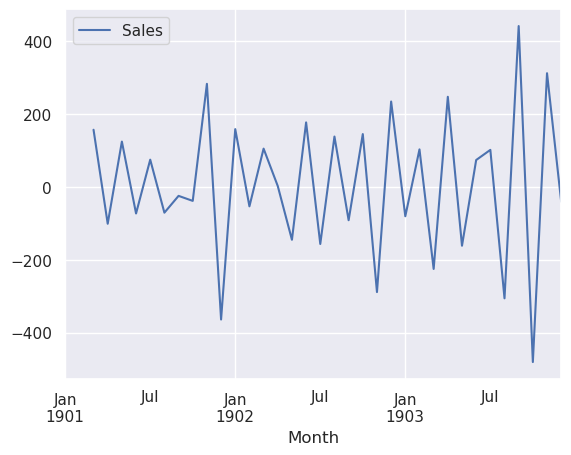

In [100]:
data.diff().diff().plot()

In [101]:
# thus data is not stationary lets make it stationary by differencing
DFTest(data.diff().dropna())

ADF Statistic: -7.249074
p-value: 0.000000
Reject the null hypothesis (H0), the data does not have a unit root and is stationary


In [103]:
# let's try second order differencing
DFTest(data.diff().diff().dropna())

ADF Statistic: -3.715053
p-value: 0.003906
Reject the null hypothesis (H0), the data does not have a unit root and is stationary


**Here we got the value of d, we took 2nd order differencing for making stationary, hence d = 2**

### acf and pacf plots

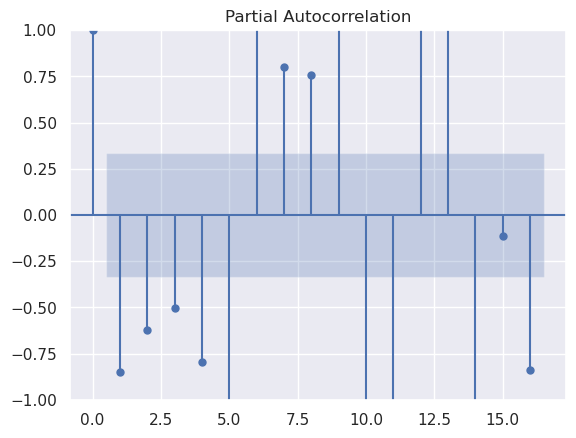

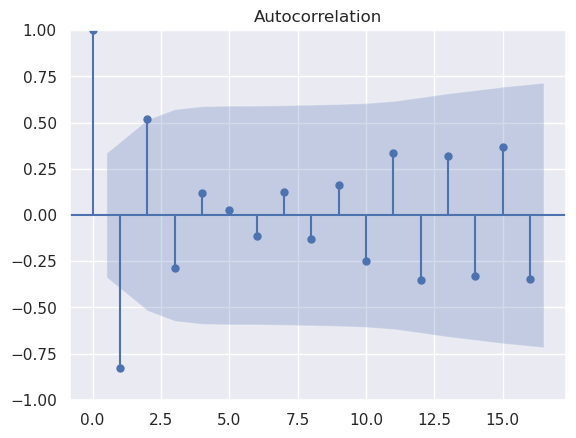

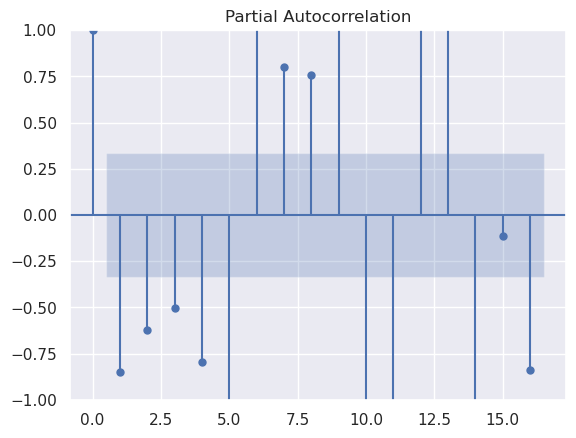

In [104]:
# acf and pacf for finding values of p and q, and d = 2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.diff().diff().dropna())
plot_pacf(data.diff().diff().dropna())

- We are getting sinusoidal graph in PACF, the spike is not predictable thus **p = 0** this model is MA(q). 
- [Resource](https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling)

### ARMA Model
Y(t) = U + b1 * y-1 +  error(e) + e(t) + Q1*e(t-1) 

In [80]:
# here q = 2 , p = 0, and d = 2
# arima model --> ARIMA(0,2,2), the values of parameters (p and q) are fixed we play with different values according acf and pacf plots
from statsmodels.tsa.arima.model import ARIMA

In [81]:
model = ARIMA(train, order=(1,2,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   32
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -172.496
Date:                Mon, 17 Apr 2023   AIC                            350.992
Time:                        11:12:07   BIC                            355.195
Sample:                    01-01-1901   HQIC                           352.337
                         - 08-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7128      0.188     -3.785      0.000      -1.082      -0.344
ma.L1         -0.9931      1.098     -0.904      0.366      -3.145       1.159
sigma2      4921.4065   4828.451      1.019      0.3

In [82]:
# lets take p = 0, q = 1, and d = 2
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train, order=(0,2,1))
model_fit1 = model1.fit()
# summary of fit model
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   32
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -181.126
Date:                Mon, 17 Apr 2023   AIC                            366.253
Time:                        11:12:19   BIC                            369.055
Sample:                    01-01-1901   HQIC                           367.149
                         - 08-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9965      2.945     -0.338      0.735      -6.768       4.775
sigma2      9239.2496   2.79e+04      0.331      0.741   -4.55e+04    6.39e+04
Ljung-Box (L1) (Q):                  13.06   Jarque-

- **For the best result in ARIMA model, we take Minium values of AIC.**
- **Here ```AIC(p= 0,d = 2,q = 2) = 346.714``` < ```AIC(p= 0,d = 2,q = 1)  = 366.253``` . Hence ```ARIMA(0,2,2)``` will give us good result as compare to ARIMA(0,2,1)**

### prediction on train data

In [107]:
# forecasting on test data for ARIMA(0,2,2)
predict=model_fit.predict(typ='levels')
predict

1901-01-01      0.000000
1901-02-01    398.497468
1901-03-01     32.643887
1901-04-01    116.105925
1901-05-01     78.896519
1901-06-01    117.041329
1901-07-01    129.648179
1901-08-01    169.754577
1901-09-01    192.362362
1901-10-01    196.803596
1901-11-01    178.743878
1901-12-01    219.187814
1902-01-01    220.983462
1902-02-01    222.792947
1902-03-01    214.326135
1902-04-01    214.311183
1902-05-01    225.525241
1902-06-01    223.934542
1902-07-01    237.597930
1902-08-01    242.188240
1902-09-01    258.922974
1902-10-01    274.352429
1902-11-01    310.734798
1902-12-01    325.588633
1903-01-01    347.098787
1903-02-01    366.163712
1903-03-01    396.086604
1903-04-01    409.774622
1903-05-01    432.935089
1903-06-01    449.862483
1903-07-01    467.200334
1903-08-01    499.933273
Freq: MS, Name: predicted_mean, dtype: float64

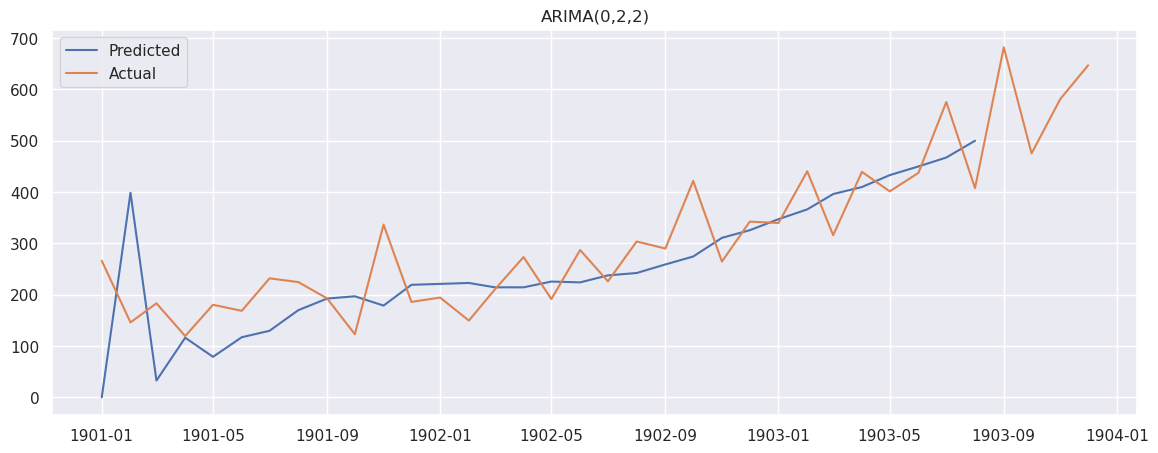

In [108]:
plt.figure(figsize = (14,5))
plt.plot(predict, label = 'Predicted')
plt.plot(data.iloc[:,-1],label = 'Actual')
plt.title('ARIMA(0,2,2)')
plt.legend();

In [109]:
# forecasting on test data for ARIMA(0,2,1)
predict1=model_fit1.predict(typ='levels')
predict1

1901-01-01      0.000000
1901-02-01    399.000008
1901-03-01     30.335120
1901-04-01    143.227539
1901-05-01     71.499738
1901-06-01    159.577500
1901-07-01    149.555647
1901-08-01    226.523064
1901-09-01    218.934759
1901-10-01    183.974629
1901-11-01    107.300356
1901-12-01    343.786783
1902-01-01    178.850899
1902-02-01    188.537051
1902-03-01    140.736525
1902-04-01    206.288248
1902-05-01    273.954064
1902-06-01    186.895295
1902-07-01    288.383995
1902-08-01    223.917415
1902-09-01    305.713051
1902-10-01    291.221895
1902-11-01    429.135627
1902-12-01    264.544268
1903-01-01    345.729266
1903-02-01    342.877670
1903-03-01    447.485304
1903-04-01    317.914398
1903-05-01    445.820068
1903-06-01    406.226168
1903-07-01    443.404036
1903-08-01    585.920294
Freq: MS, Name: predicted_mean, dtype: float64

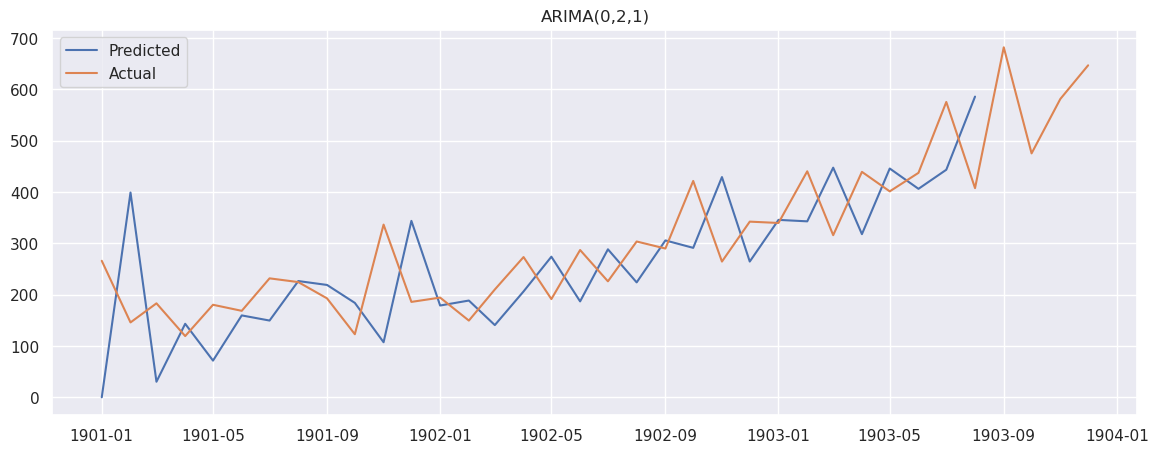

In [110]:
plt.figure(figsize = (14,5))
plt.plot(predict1, label = 'Predicted')
plt.plot(data.iloc[:,-1],label = 'Actual')
plt.title("ARIMA(0,2,1)")
plt.legend();

### prediction on test data

In [111]:
# for ARIMA(0,2,2)
forecast_test = model_fit.forecast(len(test))
forecast_test

1903-09-01    513.201957
1903-10-01    532.495516
1903-11-01    551.789075
1903-12-01    571.082634
Freq: MS, Name: predicted_mean, dtype: float64

In [112]:
forecast_test = pd.DataFrame(forecast_test)

In [114]:
forecast_test

,predicted_mean
1903-09-01,513.201957
1903-10-01,532.495516
1903-11-01,551.789075
1903-12-01,571.082634


In [115]:
forecast_test.index = test.index

In [116]:
forecast_test

,predicted_mean
Month,
1903-09-01,513.201957
1903-10-01,532.495516
1903-11-01,551.789075
1903-12-01,571.082634


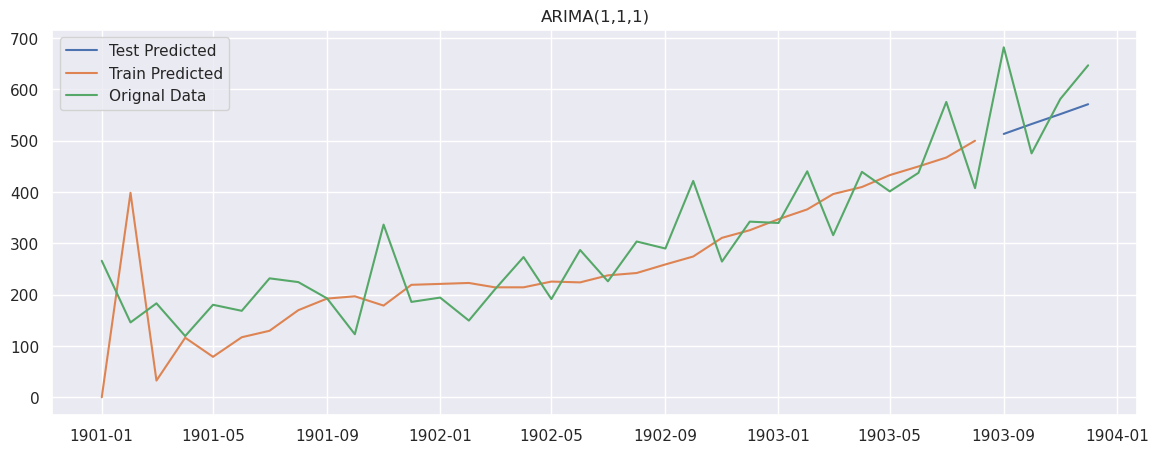

In [117]:
plt.figure(figsize = (14,5))
plt.plot(forecast_test, label = 'Test Predicted')
plt.title("ARIMA(1,1,1)")
plt.plot(predict, label = 'Train Predicted')
plt.plot(data, label = 'Orignal Data')
plt.legend();

In [118]:
# for ARIMA(0,2,1)
forecast_test1 = model_fit1.forecast(len(test))
forecast_test1

1903-09-01    412.249425
1903-10-01    416.898850
1903-11-01    421.548274
1903-12-01    426.197699
Freq: MS, Name: predicted_mean, dtype: float64

In [119]:
forecast_test1 = pd.DataFrame(forecast_test1)

In [120]:
forecast_test1

,predicted_mean
1903-09-01,412.249425
1903-10-01,416.898850
1903-11-01,421.548274
1903-12-01,426.197699


In [121]:
forecast_test1.index = test.index

In [122]:
forecast_test1

,predicted_mean
Month,
1903-09-01,412.249425
1903-10-01,416.898850
1903-11-01,421.548274
1903-12-01,426.197699


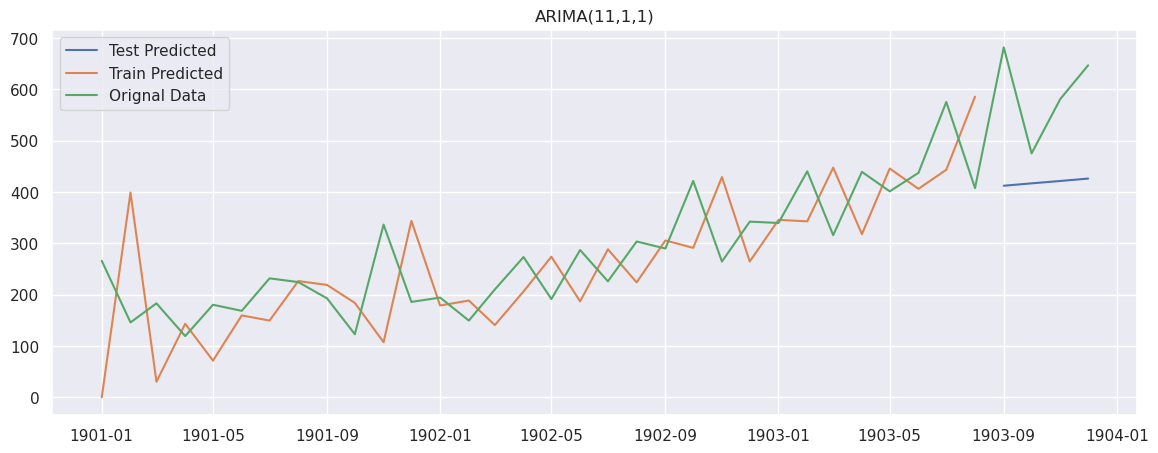

In [123]:
plt.figure(figsize = (14,5))
plt.plot(forecast_test1, label = 'Test Predicted')
plt.plot(predict1, label = 'Train Predicted')
plt.plot(data, label = 'Orignal Data')
plt.title("ARIMA(11,1,1)")
plt.legend();

### Accuracy Measurement
Root mean squre (rms) commonly used to accuracy metrics to judge forecasts.

In [124]:
#calculate rmse for ARIMA(0,2,2)
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast_test))
print("The root square mean error :",rms)
print("The mean value of  the data: ",data.mean())

The root square mean error : 97.95824864051845
The mean value of  the data:  Sales    312.6
dtype: float64


In [125]:
#calculate rmse for ARIMA(0,2,1)
from math import sqrt
from sklearn.metrics import mean_squared_error
rms1 = sqrt(mean_squared_error(test,forecast_test1))
print("The root square mean error :",rms1)
print("The mean value of  the data: ",data.mean())

The root square mean error : 193.911182402395
The mean value of  the data:  Sales    312.6
dtype: float64


### Conclusion
- **We can play more value  of p,d,q and find AIC score minimum of the model. Minimum Value of AIC give better result.**
-  Here the values of root mean squared error ARIMA(0,2,2) is lower than  ARIMA(0,2,1).
-  Thus ARIMA(0,2,2) would use to forecast data.